# Tiny illustration of Laplace approximations

This script is a super tiny illustration of a Laplace approximation - one where curvature approximation is tractable and can be easy visualised

2025-06-18 00:15:24.756 | DEBUG    | laplax.api:laplace:663 - Creating curvature MV - factor = 1/1 = 1.0
2025-06-18 00:15:24.758 | DEBUG    | laplax.api:_maybe_wrap_loader_or_batch:179 - Using *single batch* curvature evaluation.
2025-06-18 00:15:24.845 | DEBUG    | laplax.api:laplace:687 - Curvature estimated: full
2025-06-18 00:15:24.846 | DEBUG    | laplax.api:laplace:696 - Posterior callable constructed.
/home/t/Projects/laplax/examples/plotting.py:535: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


(<Figure size 325x200.861 with 1 Axes>,
 <Axes: xlabel='$\\\\theta_1$', ylabel='$\\\\theta_2$'>)

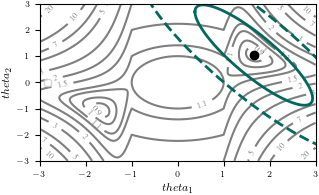

In [2]:
import jax.numpy as jnp
from jax.nn import relu
from plotting import plot_figure_1

from laplax import laplace

# You need optimized parameters,
best_params = {"theta1": jnp.array(1.6546547), "theta2": jnp.array(1.0420421)}


def model_fn(input, params):
    return relu(params["theta1"] * input - 1) * params["theta2"]


data = {  # and training data.
    "input": jnp.array([1.0, -1.0]).reshape(2, 1),
    "target": jnp.array([1.0, -1.0]).reshape(2, 1),
}

# Then apply laplax
posterior_fn, _ = laplace(
    model_fn,
    best_params,
    data,
    loss_fn="mse",
    curv_type="full",
)
curv = posterior_fn({"prior_prec": 0.2}).state["scale"]

# to get figure 1.
plot_figure_1(best_params, curv)